# ***优化算法***

# 1. Mini-batch梯度下降

① 之前我们介绍的神经网络训练过程是对所有m个样本，称为batch，通过向量化计算方式，同时进行的。

② 如果m很大，例如达到百万数量级，训练速度往往会很慢，因为每次迭代都要对所有样本进行求和运算和矩阵运算。我们将这种梯度下降算法称为Batch Gradient Descent。

① 为了解决这一问题，我们可以把m个训练样本分成若干个子集，称为mini-batches，这样每个子集包含的数据量就小了，例如只有1000，然后每次在单一子集上进行神经网络训练，速度就会大大提高。这种梯度下降算法叫做Mini-batch Gradient Descent。

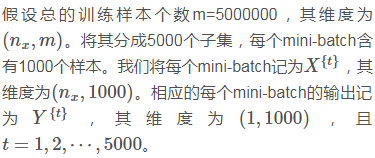

② 这里顺便总结一下我们遇到的神经网络中几类字母的上标含义：

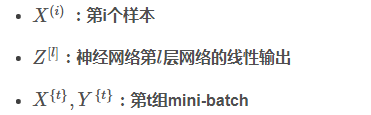

③ Mini-batches Gradient Descent的实现过程是先将总的训练样本分成T个子集（mini-batches），然后对每个mini-batch进行神经网络训练，包括Forward Propagation，Compute Cost Function，Backward Propagation，循环至T个mini-batch都训练完毕。

In [ ]:
for  t=1,⋯,T {
    Forward Propagation
    ComputeCostFunction
    BackwardPropagation
    W:=W−α⋅dW
    b:=b−α⋅db
}

① 经过T次循环之后，所有m个训练样本都进行了梯度下降计算。这个过程，我们称之为经历了一个epoch。

② 对于Batch Gradient Descent而言，一个epoch只进行一次梯度下降算法；而Mini-Batches Gradient Descent，一个epoch会进行T次梯度下降算法。

③ 值得一提的是，对于Mini-Batches Gradient Descent，可以进行多次epoch训练。而且，每次epoch，最好是将总体训练数据重新打乱、重新分成T组mini-batches，这样有利于训练出最佳的神经网络模型。

① Batch gradient descent和Mini-batch gradient descent的cost曲线如下图所示：

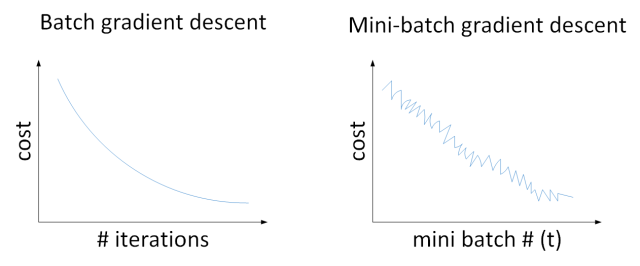

② 对于一般的神经网络模型，使用Batch gradient descent，随着迭代次数增加，cost是不断减小的。然而，使用Mini-batch gradient descent，随着在不同的mini-batch上迭代训练，其cost不是单调下降，而是受类似noise的影响，出现振荡。但整体的趋势是下降的，最终也能得到较低的cost值。

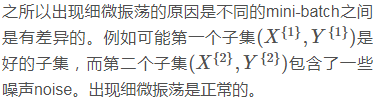

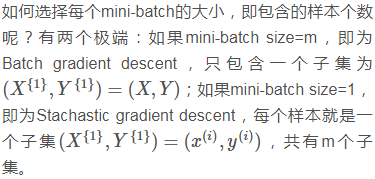

① 我们来比较一下Batch gradient descent和Stachastic gradient descent的梯度下降曲线。

② 如下图所示，蓝色的线代表Batch gradient descent，紫色的线代表Stachastic gradient descent。

③ Batch gradient descent会比较平稳地接近全局最小值，但是因为使用了所有m个样本，每次前进的速度有些慢。

④ Stachastic gradient descent每次前进速度很快，但是路线曲折，有较大的振荡，最终会在最小值附近来回波动，难以真正达到最小值处。而且在数值处理上就不能使用向量化的方法来提高运算速度。

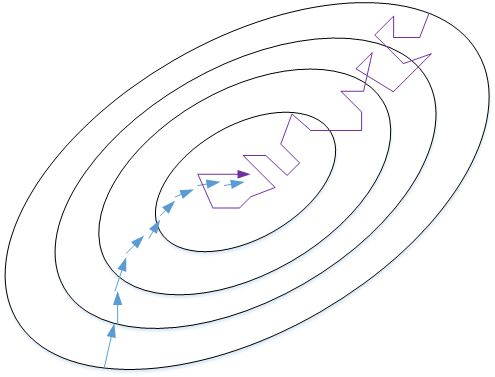

① 实际使用中，mini-batch size不能设置得太大（Batch gradient descent），也不能设置得太小（Stachastic gradient descent）。

② 这样，相当于结合了Batch gradient descent和Stachastic gradient descent各自的优点，既能使用向量化优化算法，又能较快速地找到最小值。

③ mini-batch gradient descent的梯度下降曲线如下图绿色所示，每次前进速度较快，且振荡较小，基本能接近全局最小值。

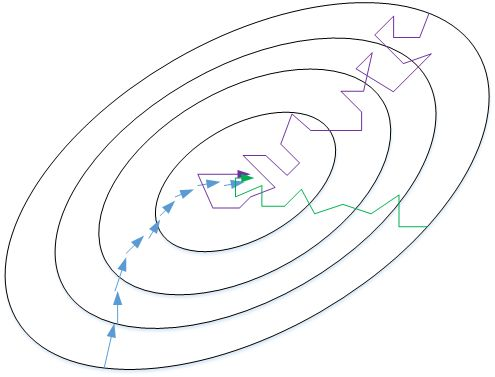

① 一般来说，如果总体样本数量m不太大时，例如m≤2000m≤2000，建议直接使用Batch gradient descent。

② 如果总体样本数量m很大时，建议将样本分成许多mini-batches。推荐常用的mini-batch size为64,128,256,512。这些都是2的幂。

③ 之所以这样设置的原因是计算机存储数据一般是2的幂，这样设置可以提高运算速度。

# 2. 加权平均

① 该部分我们将介绍指数加权平均（Exponentially weighted averages）的概念。

② 举个例子，记录半年内伦敦市的气温变化，并在二维平面上绘制出来，如下图所示：

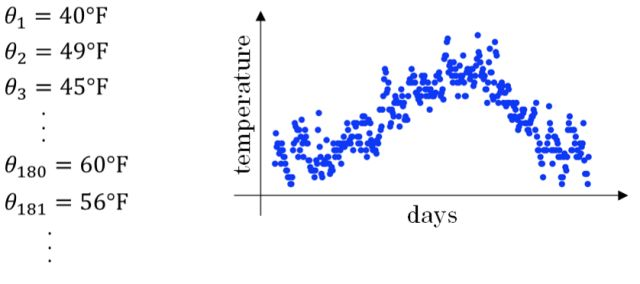

③ 看上去，温度数据似乎有noise，而且抖动较大。

④ 如果我们希望看到半年内气温的整体变化趋势，可以通过移动平均（moving average）的方法来对每天气温进行平滑处理。

① 例如我们可以设V0=0，当成第0天的气温值。

② 第一天的气温与第0天的气温有关：

③ 第二天的气温与第一天的气温有关：

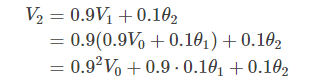

④ 第三天的气温与第二天的气温有关：

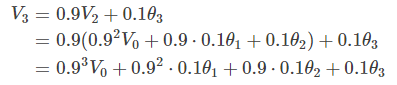

⑤ 即第t天与第t-1天的气温迭代关系为：

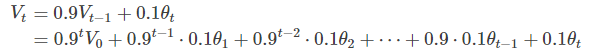

⑥ 经过移动平均处理得到的气温如下图红色曲线所示：

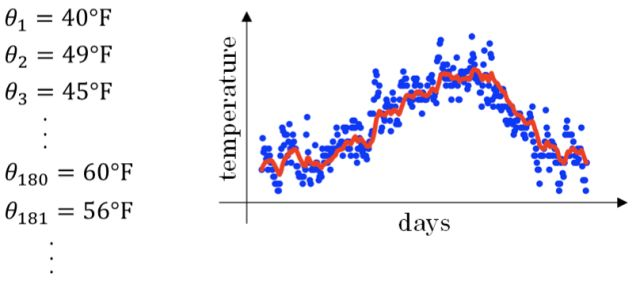

① 这种滑动平均算法称为指数加权平均（exponentially weighted average）。根据之前的推导公式，其一般形式为：

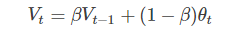

② 上面的例子中，β=0.9。β值决定了指数加权平均的天数，近似表示为：

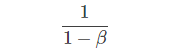

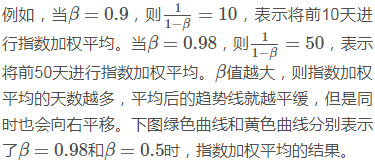

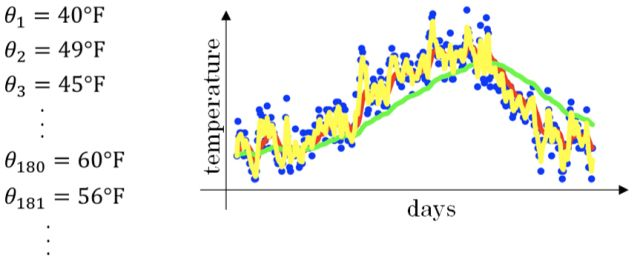

① 这里简单解释一下公式1/(1−β)是怎么来的。准确来说，指数加权平均算法跟之前所有天的数值都有关系，根据之前的推导公式就能看出。

② 但是指数是衰减的，一般认为衰减到1/e就可以忽略不计了。因此，根据之前的推导公式，我们只要证明下式就好了：

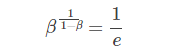

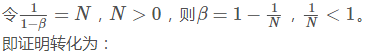

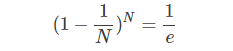

③ 显然，当N>>0时，上述等式是近似成立的。

④ 至此，简单解释了为什么指数加权平均的天数的计算公式为1/(1−β)。

① 我们将指数加权平均公式的一般形式写下来：

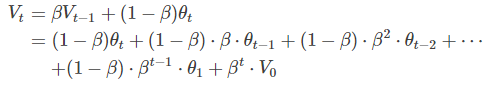

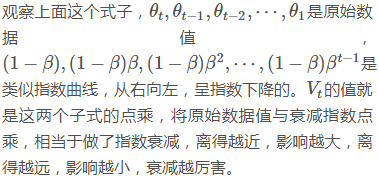

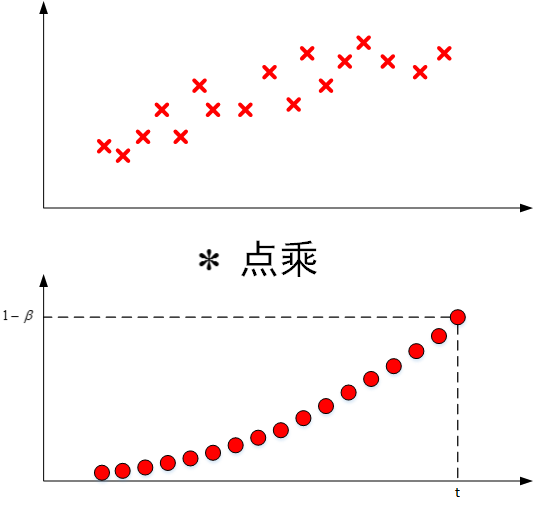

② 我们已经知道了指数加权平均的递推公式。实际应用中，为了减少内存的使用，我们可以使用这样的语句来实现指数加权平均算法：

In [ ]:
Vθ=0
Repeat {
    Get next θt
    Vθ:=βVθ+(1−β)θt
}

① 上文中提到当β=0.98时，指数加权平均结果如下图绿色曲线所示。但是实际上，真实曲线如紫色曲线所示。

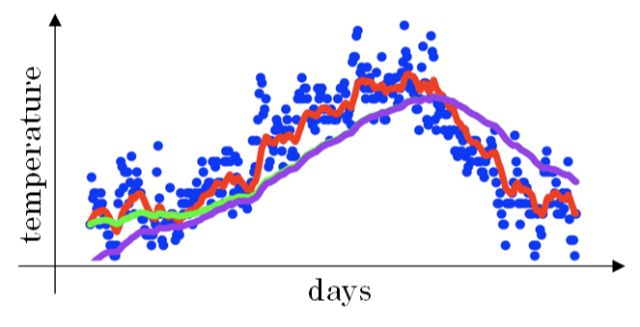

② 我们注意到，紫色曲线与绿色曲线的区别是，紫色曲线开始的时候相对较低一些。这是因为开始时我们设置V0=0，所以初始值会相对小一些，直到后面受前面的影响渐渐变小，趋于正常。

③ 修正这种问题的方法是进行偏移校正（bias correction），即在每次计算完Vt后，对Vt进行下式处理：

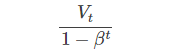

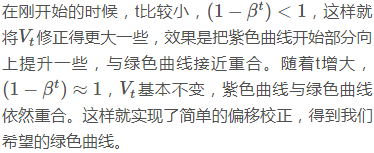

④ 值得一提的是，机器学习中，偏移校正并不是必须的。因为，在迭代一次次数后（t较大），Vt受初始值影响微乎其微，紫色曲线与绿色曲线基本重合。所以，一般可以忽略初始迭代过程，等到一定迭代之后再取值，这样就不需要进行偏移校正了。

# 3. 动量梯度下降算法

① 该部分将介绍动量梯度下降算法，其速度要比传统的梯度下降算法快很多。做法是在每次训练时，对梯度进行指数加权平均处理，然后用得到的梯度值更新权重W和常数项b。下面介绍具体的实现过程。

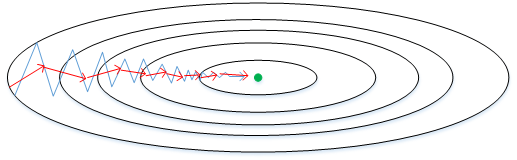

② 原始的梯度下降算法如上图蓝色折线所示。在梯度下降过程中，梯度下降的振荡较大，尤其对于W、b之间数值范围差别较大的情况。

③ 此时每一点处的梯度只与当前方向有关，产生类似折线的效果，前进缓慢。而如果对梯度进行指数加权平均，这样使当前梯度不仅与当前方向有关，还与之前的方向有关，这样处理让梯度前进方向更加平滑，减少振荡，能够更快地到达最小值处。

④ 权重W和常数项b的指数加权平均表达式如下：

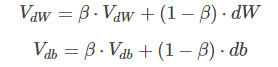

⑤ 从动量的角度来看，以权重W为例，Vdw可以成速度V，dW可以看成是加速度a。指数加权平均实际上是计算当前的速度，当前速度由之前的速度和现在的加速度共同影响。

⑥ 而β<1，又能限制速度Vdw过大。也就是说，当前的速度是渐变的，而不是瞬变的，是动量的过程。这保证了梯度下降的平稳性和准确性，减少振荡，较快地达到最小值处。

① 动量梯度下降算法的过程如下：

In [ ]:
On iteration t:
    Compute dW, db on the current mini−batch
    VdW=βVdw+(1−β)dW
    Vdb=βVdb+(1−β)db
    W=W−αVdw, b=b−αVdb

② 初始时，令Vdw=0,Vdb=0。一般设置β=0.9，即指数加权平均前10天的数据，实际应用效果较好。

③ 另外，关于偏移校正，可以不使用。因为经过10次迭代后，随着滑动平均的过程，偏移情况会逐渐消失。

④ 补充一下，在其它文献资料中，动量梯度下降还有另外一种写法：

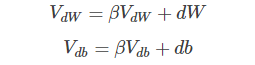

⑤ 即消去了dW和db前的系数(1−β)。这样简化了表达式，但是学习因子α相当于变成了α/(1−β)，表示α也受β的影响。从效果上来说，这种写法也是可以的，但是不够直观，且调参涉及到α，不够方便。所以，实际应用中，推荐第一种动量梯度下降的表达式。

# 4. RMSprop

① RMSprop是另外一种优化梯度下降速度的算法。每次迭代训练过程中，其权重W和常数项b的更新表达式为：

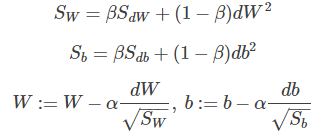

② 下面简单解释一下RMSprop算法的原理，仍然以下图为例，为了便于分析，令水平方向为W的方向，垂直方向为b的方向。

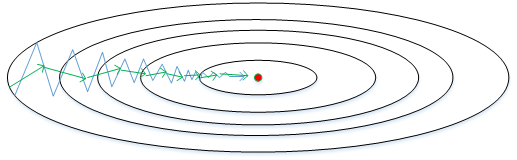

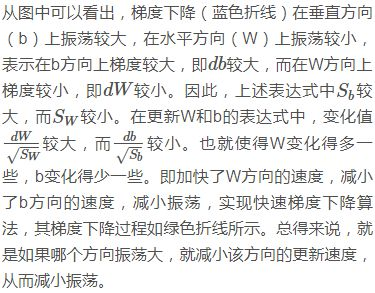

③ 还有一点需要注意的是为了避免RMSprop算法中分母为零，通常可以在分母增加一个极小的常数ε：

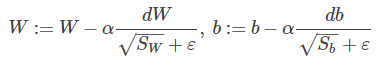

④ 其中，ε=10^−8，或者其它较小值。

# 5. Adam优化算法

① Adam（Adaptive Moment Estimation）算法结合了动量梯度下降算法和RMSprop算法。其算法流程为：

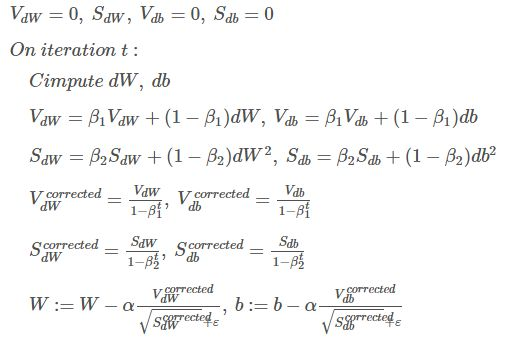

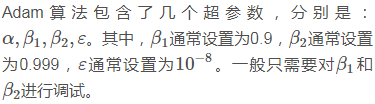

② 实际应用中，Adam算法结合了动量梯度下降和RMSprop各自的优点，使得神经网络训练速度大大提高。

# 6. 学习率衰减

① 减小学习因子α也能有效提高神经网络训练速度，这种方法被称为learning rate decay。

② Learning rate decay就是随着迭代次数增加，学习因子α逐渐减小。

① 下面用图示的方式来解释这样做的好处。下图中，蓝色折线表示使用恒定的学习因子α，由于每次训练α相同，步进长度不变，在接近最优值处的振荡也大，在最优值附近较大范围内振荡，与最优值距离就比较远。

② 绿色折线表示使用不断减小的α，随着训练次数增加，α逐渐减小，步进长度减小，使得能够在最优值处较小范围内微弱振荡，不断逼近最优值。相比较恒定的α来说，learning rate decay更接近最优值。

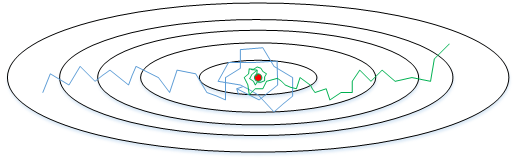

① Learning rate decay中对α可由下列公式得到：

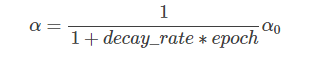

② 其中，deacy_rate是参数（可调），epoch是训练完所有样本的次数。随着epoch增加，α会不断变小。

③ 除了上面计算α的公式之外，还有其它可供选择的计算公式：

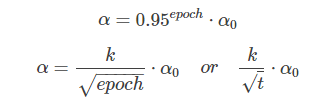

④ 其中，k为可调参数，t为mini-bach number。

⑤ 除此之外，还可以设置α为关于t的离散值，随着t增加，α呈阶梯式减小。当然，也可以根据训练情况灵活调整当前的α值，但会比较耗时间。

# 7. 局部最优问题

① 在使用梯度下降算法不断减小cost function时，可能会得到局部最优解（local optima）而不是全局最优解（global optima）。

② 之前我们对局部最优解的理解是形如碗状的凹槽，如下图左边所示。但是在神经网络中，local optima的概念发生了变化。

③ 准确地来说，大部分梯度为零的“最优点”并不是这些凹槽处，而是形如右边所示的马鞍状，称为saddle point。

④ 也就是说，梯度为零并不能保证都是convex（极小值），也有可能是concave（极大值）。

⑤ 特别是在神经网络中参数很多的情况下，所有参数梯度为零的点很可能都是右边所示的马鞍状的saddle point，而不是左边那样的local optimum。

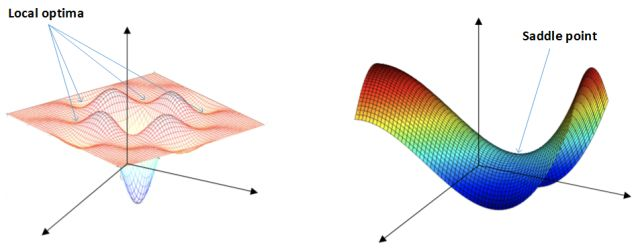

① 类似马鞍状的plateaus会降低神经网络学习速度。Plateaus是梯度接近于零的平缓区域，如下图所示。在plateaus上梯度很小，前进缓慢，到达saddle point需要很长时间。

② 到达saddle point后，由于随机扰动，梯度一般能够沿着图中绿色箭头，离开saddle point，继续前进，只是在plateaus上花费了太多时间。

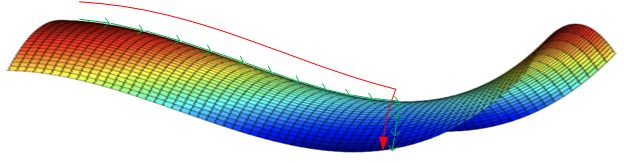

① 总的来说，关于local optima，有两点总结：

 - 只要选择合理的强大的神经网络，一般不太可能陷入local optima
 - Plateaus可能会使梯度下降变慢，降低学习速度

② 值得一提的是，上文介绍的动量梯度下降，RMSprop，Adam算法都能有效解决plateaus下降过慢的问题，大大提高神经网络的学习速度。